In [41]:
from astrocut import fits_cut
from astropy import units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm, SqrtStretch, SinhStretch, LogStretch
from astropy.table import Table
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import os

In [4]:
#首先我们打开文章作者提供的catalog
muse_cata_fits = fits.open("./catalog_muse.dat.fits")
muse_cata_fits.info()
member_catalog = muse_cata_fits[1].data

Filename: ./catalog_muse.dat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     114   ()      
  1  muse.dat      1 TableHDU        69   78R x 9C   [I2, F12.8, F12.8, F6.4, I1, I1, F6.3, F7.3, F7.3]   


In [5]:
#总共成员星系有26个，并不是23个，qf=3说明是比较好的测量结果
for i in range(0, 78):
    if member_catalog.Ampli[i] == 1.0 and member_catalog.z[i] != 0:
        print(i, "id = ",member_catalog.ID[i], "|", "ra = ", member_catalog.RAdeg[i],"de = ", member_catalog.DEdeg[i], "qf = ", member_catalog.qf[i]);

20 id =  21 | ra =  110.8495683 de =  -73.4625124 qf =  3
21 id =  22 | ra =  110.8362871 de =  -73.4568771 qf =  3
22 id =  23 | ra =  110.8252476 de =  -73.4545586 qf =  3
23 id =  24 | ra =  110.8243781 de =  -73.459905 qf =  3
24 id =  25 | ra =  110.8557313 de =  -73.4557427 qf =  3
25 id =  26 | ra =  110.8530957 de =  -73.4566588 qf =  3
26 id =  27 | ra =  110.8161206 de =  -73.4511937 qf =  3
27 id =  28 | ra =  110.8456507 de =  -73.4513365 qf =  3
28 id =  29 | ra =  110.8538419 de =  -73.450063 qf =  3
29 id =  30 | ra =  110.8185163 de =  -73.4552171 qf =  3
30 id =  31 | ra =  110.8045012 de =  -73.4561504 qf =  3
31 id =  32 | ra =  110.8550113 de =  -73.4501908 qf =  3
32 id =  33 | ra =  110.8377986 de =  -73.4536001 qf =  3
33 id =  34 | ra =  110.8326866 de =  -73.4569116 qf =  3
34 id =  35 | ra =  110.8562438 de =  -73.4506971 qf =  2
35 id =  36 | ra =  110.8257093 de =  -73.4586938 qf =  3
36 id =  37 | ra =  110.8376015 de =  -73.4561834 qf =  3
37 id =  38 | ra

In [14]:
#下面导入我们需要进行cutout的image文件的filter名称
#开始把filtername全部导入进去，总共是20个filters，index的范围为[0,19]
filter_name = ("f090w-clear_drc", "f105w_drz", "f115wn-clear_drc", "f125w_drz", "f140w_drz", "f150w-clear_drc", 
               "f160w_drz", "f200w-clear_drc", "f200wn-clear_drc", "f277w-clear_drc", 
               "f356w-clear_drc", "f435w_drc", "f444w-clear_drc", "f606w_drc", 
               "f770w_drz", "f814w_drc", "f1000w_drz", "f1500w_drz", "f1800w_drz", "ir_drc")

In [53]:
#下面为每个filter最后生成的cutout单独创建一个子文件夹以分类保存,文件夹的名字为每个filter文件“_sci”字符的前面的包含波段信息的字符串
for i in range(0, 19):
    os.makedirs('./image_cutout/{filter_name_here}_cutout'.format(filter_name_here = filter_name[i]))

Filename: ./image_raw/smacs0723-grizli-v4.0-ir_drc_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   (12000, 12000)   float32   


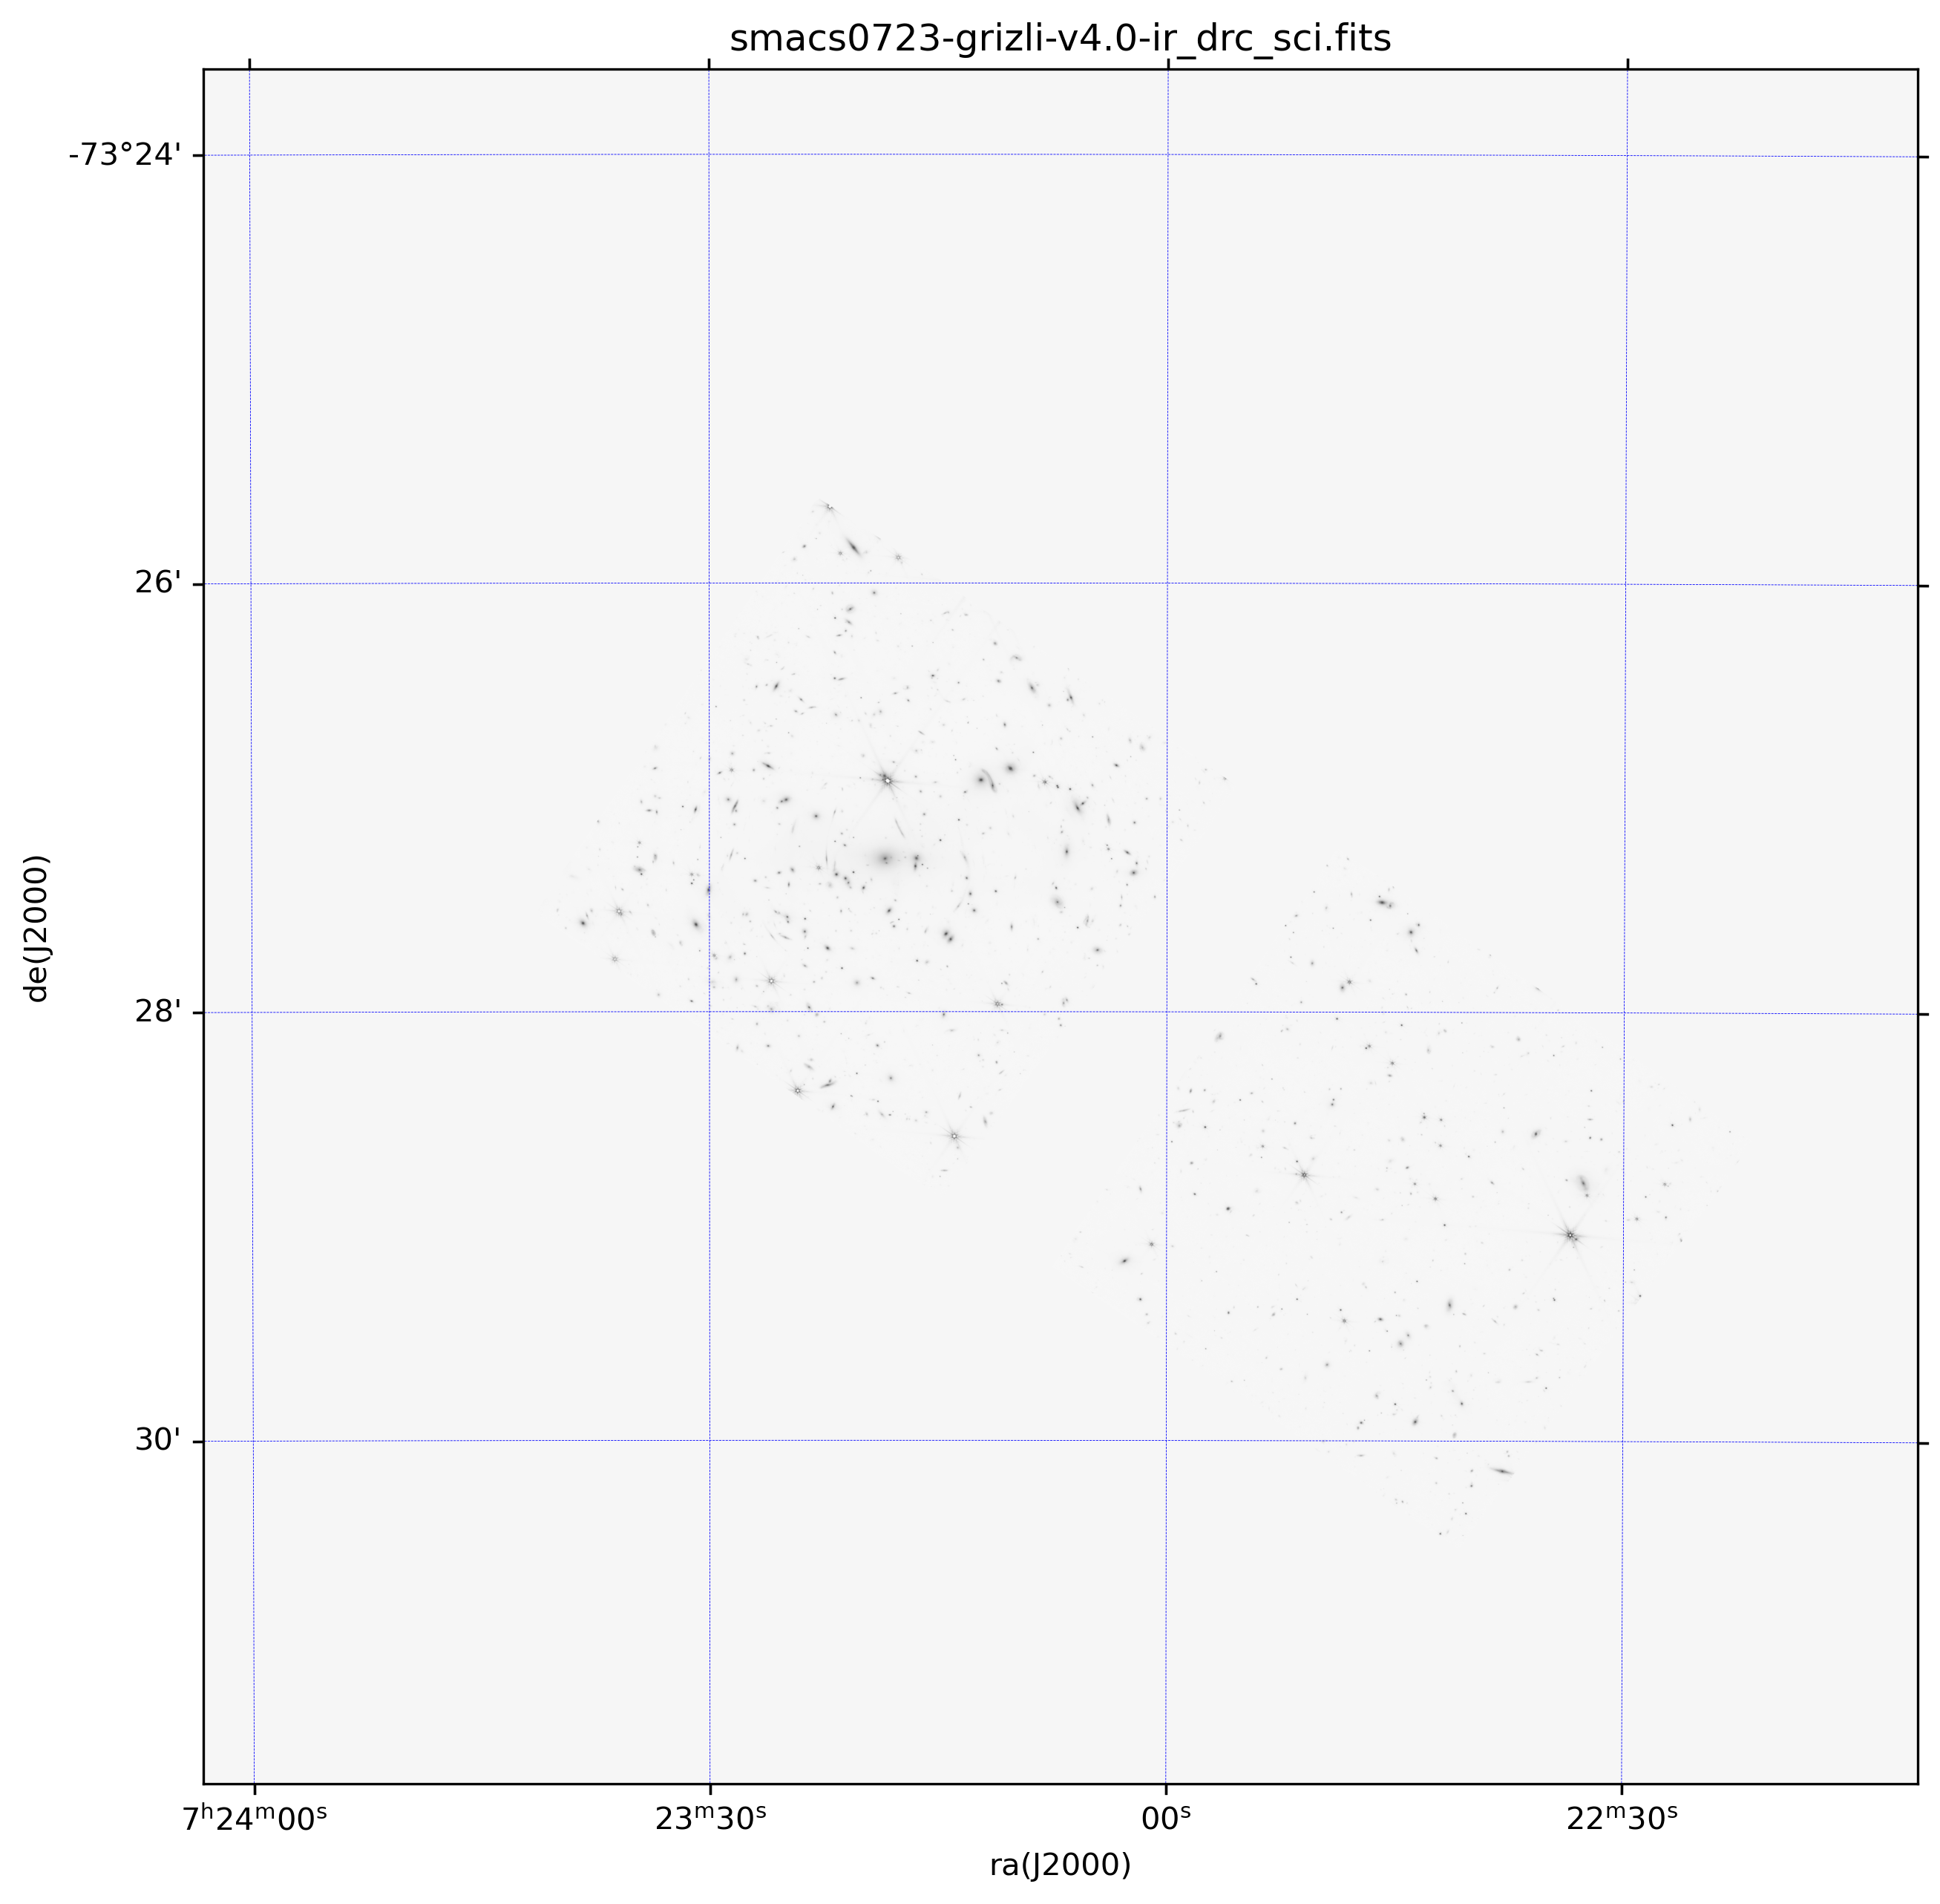

In [55]:
#文件夹创建完毕了，先测试一下，打开图像文件并呈现出来，调节index以生成不同的filter下的图像以供检查
index = 19 #调整一次范围看一下图像，检查一下是不是都能读出来，不必要去用for全部调用，会使得系统崩溃，看一下释放一下就好
image_fits = fits.open("./image_raw/smacs0723-grizli-v4.0-{filter_name_here}_sci.fits".format(filter_name_here = filter_name[index]))
image_fits.info()
target_image = image_fits[0].data
target_norm = simple_norm(target_image, stretch = 'log')

wcs = WCS(image_fits[0])

plt.figure(figsize = (10, 10), dpi = 300)
plt.subplot(projection = wcs)
plt.imshow(target_image, cmap = 'Greys', norm = target_norm, origin = 'lower')
plt.title("smacs0723-grizli-v4.0-{filter_name_here}_sci.fits".format(filter_name_here = filter_name[index]))
plt.grid(color = 'blue', ls = 'dashed', lw = 0.2)
plt.xlabel('ra(J2000)')
plt.ylabel('de(J2000)')

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs
Filename: ./image_raw/smacs0723-grizli-v4.0-f090w-clear_drc_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     123   (24000, 24000)   float32   
ID_21_f090w-clear_drc
filter = f090w-clear_drc, ID = 21, ra = 110.8495683, de = -73.4625124, z = 0.3217
./image_cutout/f090w-clear_drc/id_21_f090w-clear_drc.png
ID_22_f090w-clear_drc
filter = f090w-clear_drc, ID = 22, ra = 110.8362871, de = -73.4568771, z = 0.3241
./image_cutout/f090w-clear_drc/id_22_f090w-clear_drc.png
ID_23_f090w-clear_drc
filter = f090w-clear_drc, ID = 23, ra = 110.8252476, de = -73.4545586, z = 0.3774
./image_cutout/f090w-clear_drc/id_23_f090w-clear_drc.png
ID_24_f090w-clear_drc
filter = f090w-clear_drc, ID = 24, ra = 110.8243781, de = -73.459905, z = 0.3806
./image_cutout/f090w-clear_drc/id_24_f090w-clear_drc.png
ID_25_f090w-clear_drc
filter = f090w-clear_drc, ID = 25, ra = 110.8557313, de = -73.45574

Filename: ./image_raw/smacs0723-grizli-v4.0-f115wn-clear_drc_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   (12000, 12000)   float32   
ID_21_f115wn-clear_drc
filter = f115wn-clear_drc, ID = 21, ra = 110.8495683, de = -73.4625124, z = 0.3217
./image_cutout/f115wn-clear_drc/id_21_f115wn-clear_drc.png
ID_22_f115wn-clear_drc
filter = f115wn-clear_drc, ID = 22, ra = 110.8362871, de = -73.4568771, z = 0.3241
./image_cutout/f115wn-clear_drc/id_22_f115wn-clear_drc.png
ID_23_f115wn-clear_drc
filter = f115wn-clear_drc, ID = 23, ra = 110.8252476, de = -73.4545586, z = 0.3774
./image_cutout/f115wn-clear_drc/id_23_f115wn-clear_drc.png
ID_24_f115wn-clear_drc
filter = f115wn-clear_drc, ID = 24, ra = 110.8243781, de = -73.459905, z = 0.3806
./image_cutout/f115wn-clear_drc/id_24_f115wn-clear_drc.png
ID_25_f115wn-clear_drc
filter = f115wn-clear_drc, ID = 25, ra = 110.8557313, de = -73.4557427, z = 0.3822
./image_cutout/f115wn-clear_drc/i

Filename: ./image_raw/smacs0723-grizli-v4.0-f140w_drz_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      67   (12000, 12000)   float32   
ID_21_f140w_drz
filter = f140w_drz, ID = 21, ra = 110.8495683, de = -73.4625124, z = 0.3217
./image_cutout/f140w_drz/id_21_f140w_drz.png
ID_22_f140w_drz
filter = f140w_drz, ID = 22, ra = 110.8362871, de = -73.4568771, z = 0.3241
./image_cutout/f140w_drz/id_22_f140w_drz.png
ID_23_f140w_drz
filter = f140w_drz, ID = 23, ra = 110.8252476, de = -73.4545586, z = 0.3774
./image_cutout/f140w_drz/id_23_f140w_drz.png
ID_24_f140w_drz
filter = f140w_drz, ID = 24, ra = 110.8243781, de = -73.459905, z = 0.3806
./image_cutout/f140w_drz/id_24_f140w_drz.png
ID_25_f140w_drz
filter = f140w_drz, ID = 25, ra = 110.8557313, de = -73.4557427, z = 0.3822
./image_cutout/f140w_drz/id_25_f140w_drz.png
ID_26_f140w_drz
filter = f140w_drz, ID = 26, ra = 110.8530957, de = -73.4566588, z = 0.3836
./image_cutout/f140w_drz/id_2

ID_21_f160w_drz
filter = f160w_drz, ID = 21, ra = 110.8495683, de = -73.4625124, z = 0.3217
./image_cutout/f160w_drz/id_21_f160w_drz.png
ID_22_f160w_drz
filter = f160w_drz, ID = 22, ra = 110.8362871, de = -73.4568771, z = 0.3241
./image_cutout/f160w_drz/id_22_f160w_drz.png
ID_23_f160w_drz
filter = f160w_drz, ID = 23, ra = 110.8252476, de = -73.4545586, z = 0.3774
./image_cutout/f160w_drz/id_23_f160w_drz.png
ID_24_f160w_drz
filter = f160w_drz, ID = 24, ra = 110.8243781, de = -73.459905, z = 0.3806
./image_cutout/f160w_drz/id_24_f160w_drz.png
ID_25_f160w_drz
filter = f160w_drz, ID = 25, ra = 110.8557313, de = -73.4557427, z = 0.3822
./image_cutout/f160w_drz/id_25_f160w_drz.png
ID_26_f160w_drz
filter = f160w_drz, ID = 26, ra = 110.8530957, de = -73.4566588, z = 0.3836
./image_cutout/f160w_drz/id_26_f160w_drz.png
ID_27_f160w_drz
filter = f160w_drz, ID = 27, ra = 110.8161206, de = -73.4511937, z = 0.3844
./image_cutout/f160w_drz/id_27_f160w_drz.png
ID_28_f160w_drz
filter = f160w_drz, ID = 2

ID_22_f200wn-clear_drc
filter = f200wn-clear_drc, ID = 22, ra = 110.8362871, de = -73.4568771, z = 0.3241
./image_cutout/f200wn-clear_drc/id_22_f200wn-clear_drc.png
ID_23_f200wn-clear_drc
filter = f200wn-clear_drc, ID = 23, ra = 110.8252476, de = -73.4545586, z = 0.3774
./image_cutout/f200wn-clear_drc/id_23_f200wn-clear_drc.png
ID_24_f200wn-clear_drc
filter = f200wn-clear_drc, ID = 24, ra = 110.8243781, de = -73.459905, z = 0.3806
./image_cutout/f200wn-clear_drc/id_24_f200wn-clear_drc.png
ID_25_f200wn-clear_drc
filter = f200wn-clear_drc, ID = 25, ra = 110.8557313, de = -73.4557427, z = 0.3822
./image_cutout/f200wn-clear_drc/id_25_f200wn-clear_drc.png
ID_26_f200wn-clear_drc
filter = f200wn-clear_drc, ID = 26, ra = 110.8530957, de = -73.4566588, z = 0.3836
./image_cutout/f200wn-clear_drc/id_26_f200wn-clear_drc.png
ID_27_f200wn-clear_drc
filter = f200wn-clear_drc, ID = 27, ra = 110.8161206, de = -73.4511937, z = 0.3844
./image_cutout/f200wn-clear_drc/id_27_f200wn-clear_drc.png
ID_28_f200w

ID_46_f277w-clear_drc
filter = f277w-clear_drc, ID = 46, ra = 110.8368347, de = -73.4565146, z = 0.398
./image_cutout/f277w-clear_drc/id_46_f277w-clear_drc.png
Filename: ./image_raw/smacs0723-grizli-v4.0-f356w-clear_drc_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      69   (12000, 12000)   float32   
ID_21_f356w-clear_drc
filter = f356w-clear_drc, ID = 21, ra = 110.8495683, de = -73.4625124, z = 0.3217
./image_cutout/f356w-clear_drc/id_21_f356w-clear_drc.png
ID_22_f356w-clear_drc
filter = f356w-clear_drc, ID = 22, ra = 110.8362871, de = -73.4568771, z = 0.3241
./image_cutout/f356w-clear_drc/id_22_f356w-clear_drc.png
ID_23_f356w-clear_drc
filter = f356w-clear_drc, ID = 23, ra = 110.8252476, de = -73.4545586, z = 0.3774
./image_cutout/f356w-clear_drc/id_23_f356w-clear_drc.png
ID_24_f356w-clear_drc
filter = f356w-clear_drc, ID = 24, ra = 110.8243781, de = -73.459905, z = 0.3806
./image_cutout/f356w-clear_drc/id_24_f356w-clear_drc.

Filename: ./image_raw/smacs0723-grizli-v4.0-f444w-clear_drc_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      69   (12000, 12000)   float32   
ID_21_f444w-clear_drc
filter = f444w-clear_drc, ID = 21, ra = 110.8495683, de = -73.4625124, z = 0.3217
./image_cutout/f444w-clear_drc/id_21_f444w-clear_drc.png
ID_22_f444w-clear_drc
filter = f444w-clear_drc, ID = 22, ra = 110.8362871, de = -73.4568771, z = 0.3241
./image_cutout/f444w-clear_drc/id_22_f444w-clear_drc.png
ID_23_f444w-clear_drc
filter = f444w-clear_drc, ID = 23, ra = 110.8252476, de = -73.4545586, z = 0.3774
./image_cutout/f444w-clear_drc/id_23_f444w-clear_drc.png
ID_24_f444w-clear_drc
filter = f444w-clear_drc, ID = 24, ra = 110.8243781, de = -73.459905, z = 0.3806
./image_cutout/f444w-clear_drc/id_24_f444w-clear_drc.png
ID_25_f444w-clear_drc
filter = f444w-clear_drc, ID = 25, ra = 110.8557313, de = -73.4557427, z = 0.3822
./image_cutout/f444w-clear_drc/id_25_f444w-clear_drc

ID_21_f770w_drz
filter = f770w_drz, ID = 21, ra = 110.8495683, de = -73.4625124, z = 0.3217
./image_cutout/f770w_drz/id_21_f770w_drz.png
ID_22_f770w_drz
filter = f770w_drz, ID = 22, ra = 110.8362871, de = -73.4568771, z = 0.3241
./image_cutout/f770w_drz/id_22_f770w_drz.png
ID_23_f770w_drz
filter = f770w_drz, ID = 23, ra = 110.8252476, de = -73.4545586, z = 0.3774
./image_cutout/f770w_drz/id_23_f770w_drz.png
ID_24_f770w_drz
filter = f770w_drz, ID = 24, ra = 110.8243781, de = -73.459905, z = 0.3806
./image_cutout/f770w_drz/id_24_f770w_drz.png
ID_25_f770w_drz
filter = f770w_drz, ID = 25, ra = 110.8557313, de = -73.4557427, z = 0.3822
./image_cutout/f770w_drz/id_25_f770w_drz.png
ID_26_f770w_drz
filter = f770w_drz, ID = 26, ra = 110.8530957, de = -73.4566588, z = 0.3836
./image_cutout/f770w_drz/id_26_f770w_drz.png
ID_27_f770w_drz
filter = f770w_drz, ID = 27, ra = 110.8161206, de = -73.4511937, z = 0.3844
./image_cutout/f770w_drz/id_27_f770w_drz.png
ID_28_f770w_drz
filter = f770w_drz, ID = 2

ID_26_f1000w_drz
filter = f1000w_drz, ID = 26, ra = 110.8530957, de = -73.4566588, z = 0.3836
./image_cutout/f1000w_drz/id_26_f1000w_drz.png
ID_27_f1000w_drz
filter = f1000w_drz, ID = 27, ra = 110.8161206, de = -73.4511937, z = 0.3844
./image_cutout/f1000w_drz/id_27_f1000w_drz.png
ID_28_f1000w_drz
filter = f1000w_drz, ID = 28, ra = 110.8456507, de = -73.4513365, z = 0.3847
./image_cutout/f1000w_drz/id_28_f1000w_drz.png
ID_29_f1000w_drz
filter = f1000w_drz, ID = 29, ra = 110.8538419, de = -73.450063, z = 0.3848
./image_cutout/f1000w_drz/id_29_f1000w_drz.png
ID_30_f1000w_drz
filter = f1000w_drz, ID = 30, ra = 110.8185163, de = -73.4552171, z = 0.3849
./image_cutout/f1000w_drz/id_30_f1000w_drz.png
ID_31_f1000w_drz
filter = f1000w_drz, ID = 31, ra = 110.8045012, de = -73.4561504, z = 0.3864
./image_cutout/f1000w_drz/id_31_f1000w_drz.png
ID_32_f1000w_drz
filter = f1000w_drz, ID = 32, ra = 110.8550113, de = -73.4501908, z = 0.3865
./image_cutout/f1000w_drz/id_32_f1000w_drz.png
ID_33_f1000w_d

ID_30_f1800w_drz
filter = f1800w_drz, ID = 30, ra = 110.8185163, de = -73.4552171, z = 0.3849
./image_cutout/f1800w_drz/id_30_f1800w_drz.png
ID_31_f1800w_drz
filter = f1800w_drz, ID = 31, ra = 110.8045012, de = -73.4561504, z = 0.3864
./image_cutout/f1800w_drz/id_31_f1800w_drz.png
ID_32_f1800w_drz
filter = f1800w_drz, ID = 32, ra = 110.8550113, de = -73.4501908, z = 0.3865
./image_cutout/f1800w_drz/id_32_f1800w_drz.png
ID_33_f1800w_drz
filter = f1800w_drz, ID = 33, ra = 110.8377986, de = -73.4536001, z = 0.3865
./image_cutout/f1800w_drz/id_33_f1800w_drz.png
ID_34_f1800w_drz
filter = f1800w_drz, ID = 34, ra = 110.8326866, de = -73.4569116, z = 0.3869
./image_cutout/f1800w_drz/id_34_f1800w_drz.png
ID_35_f1800w_drz
filter = f1800w_drz, ID = 35, ra = 110.8562438, de = -73.4506971, z = 0.3872
./image_cutout/f1800w_drz/id_35_f1800w_drz.png
ID_36_f1800w_drz
filter = f1800w_drz, ID = 36, ra = 110.8257093, de = -73.4586938, z = 0.3888
./image_cutout/f1800w_drz/id_36_f1800w_drz.png
ID_37_f1800w_

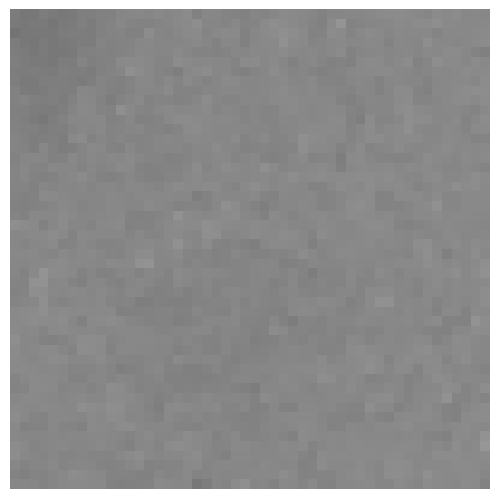

In [61]:
%time
#下面开始cutout，我们的目标是希望通过嵌套的循环，由catalog直接判断出具有membership的星系，并且将cutout保存到我们刚才创建的各自的文件夹当中
for j in range(0, 19):
    #导入对应j的fits数据到“image_fits”这个变量里面，对于每个j，该量都会发生变化
    image_fits = fits.open("./image_raw/smacs0723-grizli-v4.0-{filter_name_here}_sci.fits".format(filter_name_here = filter_name[j]))
    #查看fits文件的信息
    image_fits.info()
    #将给定j指数的图像的data导入到“target_image”这个变量当中
    target_image = image_fits[0].data
    #设定log拉伸scale的norm，以便于我们看到图像的更多的细节
    target_norm = simple_norm(target_image, stretch = 'log')
    #导入wcs信息，便于我们通过fk5(j2000)的坐标信息来找到我们需要的源
    wcs = WCS(image_fits[0])
    #图像的信息准备完毕，下面我们开始对单个图像进行cutout，catalog总的星系数量为79，结合判据筛选出我们需要的成员星系
    for i in range(0, 78):
        if member_catalog.Ampli[i] == 1.0 and member_catalog.z[i] != 0:
            #设置cutout的box的中心位置
            position = SkyCoord(member_catalog.RAdeg[i]*u.deg, member_catalog.DEdeg[i]*u.deg, frame = 'fk5')
            #设置cutout的box大小
            size = u.Quantity((2, 2), u.arcsec)
            #cutout的数据获取
            cutout = Cutout2D(target_image, position, size, wcs = wcs)
            #设置裁切名称：filter+ID+position+redshift
            cutout_name = 'filter = {filter_name_here}, ID = {ID}, ra = {RA}, de = {DE}, z = {Z}'\
            .format(ID = member_catalog.ID[i], 
                    RA = member_catalog.RAdeg[i], 
                    DE = member_catalog.DEdeg[i], 
                    Z = member_catalog.z[i], 
                    filter_name_here = filter_name[j])
            #设置裁切保存的文件名：ID+filter（这样就够了！）
            cutout_file_name = 'ID_{ID}_{filter_name_here}'\
            .format(ID = member_catalog.ID[i], filter_name_here = filter_name[j])
            #设置裁切保存的文件路径：“./image_cutout/...”（之前使用命令生成过了）
            #这里设置的三个变量名应该可以在savefig中直接调用，但是我没有尝试
            #设置这三个的意义起初是为了在fig中展示出来
            #后来发现要拼接图片，就得去掉无关元素，由于图片cutout很多，run完了一个print一个的信息，也方便检查，所以没丢掉
            cutout_file_path = './image_cutout/{filter_name_here}/id_{ID}_{filter_name_here}.png'\
            .format(ID = member_catalog.ID[i], filter_name_here = filter_name[j])
            print(cutout_file_name)
            print(cutout_name)
            print(cutout_file_path)
            plt.subplot(projection = wcs)
            plt.imshow(cutout.data, cmap = 'Greys', norm = target_norm, origin = 'lower')
            #去掉坐标轴以及轴标、图标题，直接稀释掉
            #plt.title(cutout_name)
            #plt.grid(color = 'blue', ls = 'dashed', lw = 0.2)
            #plt.xlabel('ra')
            #plt.ylabel('de')
            #去掉x轴（仅仅是不显示，但是还是要把这一项turn on）
            plt.xticks([])
            #去掉y轴（仅仅是不显示，但是还是要把这一项turn on）
            plt.yticks([])
            #去掉坐标轴（仅仅是不显示，但是还是要把这一项turn on）
            plt.axis('off')
            #为了输出透明图像，还要把坐标轴的locator参数给设置为null，边距也要调整
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
            plt.margins(0,0)
            #生成图片后保存，注意这里不能用plt.show()，不然上一个图像的space释放不出来，就不能运行下一个了
            plt.savefig("./image_cutout/{filter_name_here}_cutout/id_{ID}_{filter_name_here}.png".format(filter_name_here = filter_name[j], ID = member_catalog.ID[i]), dpi = 400, pad_inches = 0, bbox_inches = 'tight')